# 次元削減

## 主成分分析 (PCA; Principal Component Analysis)

高次元データにおいて分散が最大となる方向を見つけ出し，同じかそれよりも低い次元の部分空間へ写像することが目的

$$
\newcommand{\vx}{\mathbf{x}}
\newcommand{\vz}{\mathbf{z}}
\newcommand{\vv}{\mathbf{v}}
\newcommand{\R}{\mathbb{R}}
\newcommand{\vmu}{\boldsymbol{\mu}}
\vz = W \vx
$$

ここで，$\vx \in \R^d$ は変換前のデータ，$\vz \in \R^k$ は変換後のデータ．$W \in \R^{k \times d}$ は変換行列と呼ばれる．

> PCA はスケーリングに対して非常に敏感なので，$\vx$ は事前に標準化 ${\displaystyle \vx \leftarrow \frac{\vx - \vmu_x}{\sigma_x}}$ しておく必要がある．

この部分に関しては疑問．平均を 0 にする ${\displaystyle \vx \leftarrow \vx - \vmu(\vx)}$ んじゃないの？

### 

$$
C = \mathrm{cov}[X]
$$

$$
C \vv_i = \lambda_i \vv_i
$$

となるような $||\vv_i|| = 1$ の固有ベクトルが存在．

$V = \begin{pmatrix}\vv_1, \dots, \vv_M\end{pmatrix}$ とすると，$V^\top \vx$ によって，固有ベクトルを基底ベクトルとするベクトル空間に，任意の $\vx$ を飛ばせる．

この時，$\vv_i^\top \vx$ は，新たなベクトル空間の $i$ 番目の軸の座標を表す．

In [7]:
# ワインのデータを取得
import pandas as pd
import numpy as np

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df_wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [18]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

mean = np.r_[X_train, X_test].mean(axis=0)
X_train /= mean
X_test /= mean

In [43]:
C = np.cov(X_train.T)
eig_values, V = np.linalg.eig(C)

# test
i = 1
lam = eig_values[i]
v = V[:,i]

print(lam*v)
print(C.dot(v))

[ 0.02198246  0.10533761  0.02130494 -0.00649946  0.02547639  0.02900408
  0.02905478 -0.01453567  0.03217381  0.21683682 -0.05284075 -0.03016875
  0.12985132]
[ 0.02198246  0.10533761  0.02130494 -0.00649946  0.02547639  0.02900408
  0.02905478 -0.01453567  0.03217381  0.21683682 -0.05284075 -0.03016875
  0.12985132]


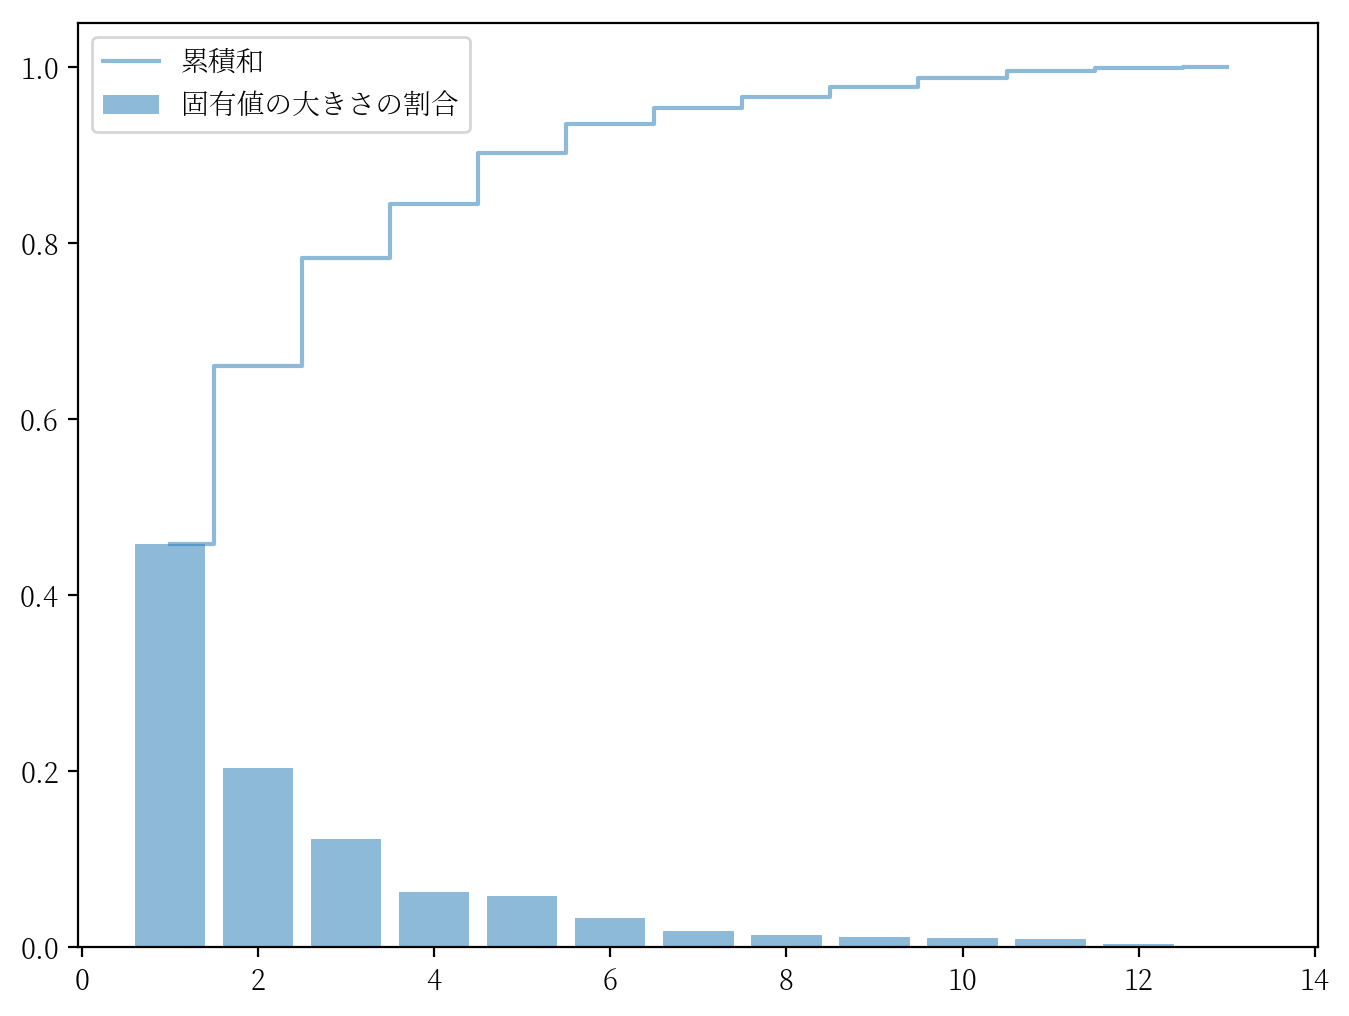

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline


total = sum(eig_values)
lam_ratio = [lam / total for lam in sorted(eig_values, reverse=True)]
lam_ratio_cum = np.cumsum(lam_ratio)

plt.bar(range(1,14), lam_ratio, alpha=.5, align='center',
        label='固有値の大きさの割合')
plt.step(range(1,14), lam_ratio_cum, alpha=.5, where='mid',
        label='累積和')
plt.legend()
plt.show()

In [1]:
import numpy as np

In [12]:
mean = [3,3,3,3]
cov = [[1,0,0,0],[0,2,0,0],[0,0,3,0],[0,0,0,4]]
N = 1000
X = np.random.multivariate_normal(mean, cov, N)

np.cov(X.T)

array([[ 9.62550652e-01, -1.17801891e-02,  5.07379234e-02,
        -8.81206937e-04],
       [-1.17801891e-02,  2.11633079e+00, -6.76655220e-02,
        -6.46010474e-02],
       [ 5.07379234e-02, -6.76655220e-02,  2.69293584e+00,
        -3.82150288e-02],
       [-8.81206937e-04, -6.46010474e-02, -3.82150288e-02,
         3.73997994e+00]])

In [24]:
X_ = X - X.mean(axis=0)
np.dot(X_.T, X_) / N

array([[ 9.61588101e-01, -1.17684089e-02,  5.06871854e-02,
        -8.80325730e-04],
       [-1.17684089e-02,  2.11421446e+00, -6.75978565e-02,
        -6.45364463e-02],
       [ 5.06871854e-02, -6.75978565e-02,  2.69024291e+00,
        -3.81768138e-02],
       [-8.80325730e-04, -6.45364463e-02, -3.81768138e-02,
         3.73623996e+00]])

In [35]:
mean = [3,3,3,3]
cov = [[1,0,0,0],[0,2,0,0],[0,0,3,0],[0,0,0,4]]
N = 1000
X = np.random.multivariate_normal(mean, cov, N)

def PCA(X, n_components):
  '''Reduce the dimention by principal components analysis

  Parameters
  ----------
  X : matrix with shape (n_samples, n_features)
    A design matrix to reduce the dimention.

  n_components : int
    A number of dimention to reduce.

  Returns
  -------
  new_X : matrix with shape (n_samples, n_components)
    A matrix reduced by PCA.
  '''

  _X = np.array(X)
  _X -= _X.mean(axis=0)

  n_samples  = _X.shape[0]
  n_features = _X.shape[1]
  assert(n_features >= n_components)

  C = X.T.dot(X) / n_samples
  eig_values, V = np.linalg.eig(C)

  index = np.argsort(eig_values)[::-1]
  W = V[:, index[:n_components]]

  return _X.dot(W)

In [41]:
PCA(X, 5)

AssertionError: 

In [29]:
V

array([[ 0.47446284,  0.85722367,  0.09781452,  0.17459929],
       [ 0.49785003, -0.44342293,  0.18022117,  0.72321628],
       [ 0.49800597, -0.2150849 ,  0.57032323, -0.61681436],
       [ 0.52822383, -0.14927212, -0.7954144 , -0.25693063]])

In [33]:
W = V[:,index[:2]]

In [34]:
X.dot(W)

array([[ 6.16132546, -1.26258644],
       [ 6.87707327, -1.59248147],
       [ 7.20210047,  1.64498775],
       ...,
       [ 4.91125299,  0.27824734],
       [ 7.32761436, -0.15370512],
       [ 6.58582821,  0.25813984]])